In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from data_load import image_data_loader

In [2]:
X, y = image_data_loader()

In [3]:
len(X)

17886

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

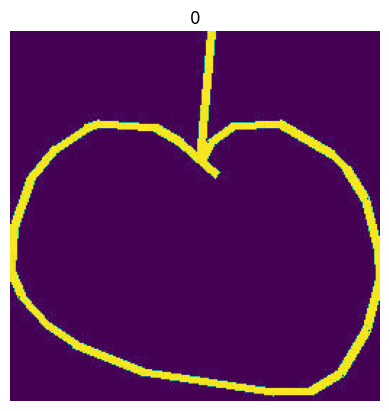

In [5]:
plt.axis('off')
plt.title(y[0])
plt.imshow(X[0])

In [6]:
from sklearn.utils import shuffle

In [7]:
X, y = shuffle(X, y)

In [8]:
def split_to_train_test(data, train_ratio=0.8, test_ratio=0.1):
    SIZE = len(data)
    train = data[:int(SIZE * train_ratio)]
    rest = data[int(SIZE * train_ratio):]
    test = rest[:int(SIZE * test_ratio)]
    val = rest[int(SIZE * test_ratio):]

    print(len(train), len(test), len(val))

    return train, test, val

In [9]:
train_X, test_X, val_X = split_to_train_test(X)

14308 1788 1790


In [10]:
train_y, test_y, val_y = split_to_train_test(y)


14308 1788 1790


In [11]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
val_X = np.expand_dims(val_X, axis=3)
train_X.shape

(14308, 255, 255, 1)

In [12]:
IMG_SIZE = 28
train_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), train_X)))
val_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), val_X)))
test_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), test_X)))

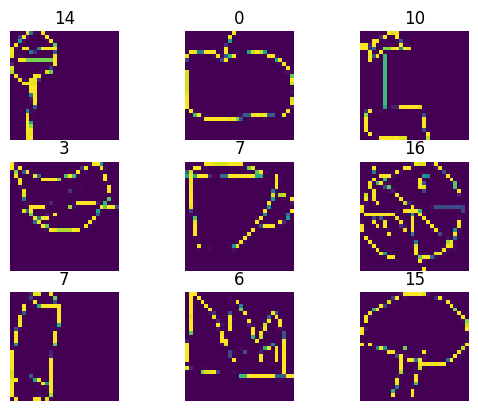

In [13]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(int(train_y[i]))
    plt.imshow(train_X[i]);

In [14]:
import pandas as pd

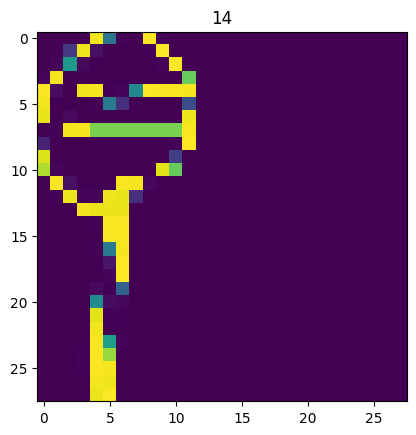

In [15]:
plt.title(train_y[0])
plt.imshow(train_X[0])

# **MODEL**

In [16]:
"""
If your Y
is are one-hot encoded, use categorical_crossentropy.
Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Y
is are integers, use sparse_categorical_crossentropy.
Examples for above 3-class classification problem: [1] , [2], [3]
"""

'\nIf your Y\nis are one-hot encoded, use categorical_crossentropy.\nExamples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\n\nBut if your Y\nis are integers, use sparse_categorical_crossentropy.\nExamples for above 3-class classification problem: [1] , [2], [3]\n'

In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [18]:
input_shape = train_X.shape[1:]
input_shape

(28, 28, 1)

In [19]:
from data_loader import categories

In [20]:
num_classes = len(categories)
num_classes

19

In [21]:
data_augmentation = tf.keras.Sequential([
  layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.5, 0.2)
])

In [64]:
data_augmentation = tf.keras.Sequential([
  layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
  layers.RandomZoom(0.5, 0.2)
])

In [87]:
model = Sequential()

model.add(data_augmentation)
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())    

model.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
    
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
    
model.add(layers.Dense(num_classes, activation="softmax"))

In [88]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [89]:
from tensorflow.keras import callbacks

In [90]:
cbs = [
    callbacks.ModelCheckpoint(
        'model_saves',
        save_weights_only=True
    ),
    callbacks.EarlyStopping(
        patience=2,
        min_delta=0.001
    )
]

In [91]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=15,
    batch_size=1024,
    verbose=2,
    callbacks=cbs,
    shuffle=True
)

Epoch 1/15
14/14 - 9s - loss: 1.9515 - accuracy: 0.4019 - val_loss: 7.1152 - val_accuracy: 0.0877 - 9s/epoch - 628ms/step
Epoch 2/15
14/14 - 7s - loss: 1.2644 - accuracy: 0.6139 - val_loss: 3.7781 - val_accuracy: 0.1749 - 7s/epoch - 525ms/step
Epoch 3/15
14/14 - 8s - loss: 1.0070 - accuracy: 0.6910 - val_loss: 2.0272 - val_accuracy: 0.4050 - 8s/epoch - 550ms/step
Epoch 4/15
14/14 - 8s - loss: 0.8575 - accuracy: 0.7306 - val_loss: 1.8991 - val_accuracy: 0.4397 - 8s/epoch - 601ms/step
Epoch 5/15
14/14 - 8s - loss: 0.7469 - accuracy: 0.7676 - val_loss: 1.2187 - val_accuracy: 0.6190 - 8s/epoch - 607ms/step
Epoch 6/15
14/14 - 8s - loss: 0.6562 - accuracy: 0.7958 - val_loss: 1.1884 - val_accuracy: 0.6330 - 8s/epoch - 603ms/step
Epoch 7/15
14/14 - 8s - loss: 0.5807 - accuracy: 0.8185 - val_loss: 0.8386 - val_accuracy: 0.7447 - 8s/epoch - 604ms/step
Epoch 8/15
14/14 - 8s - loss: 0.5242 - accuracy: 0.8341 - val_loss: 0.8225 - val_accuracy: 0.7520 - 8s/epoch - 606ms/step
Epoch 9/15
14/14 - 8s - 

In [92]:
model.evaluate(test_X, test_y)

56/56 [==============================] - 0s 7ms/step - loss: 0.6689 - accuracy: 0.8087


[0.6689218878746033, 0.8087248206138611]

In [93]:
pred = model.predict(test_X)

56/56 [==============================] - 0s 7ms/step


In [94]:
np.argmax(pred[0])

6

In [95]:
test_y[0]

6

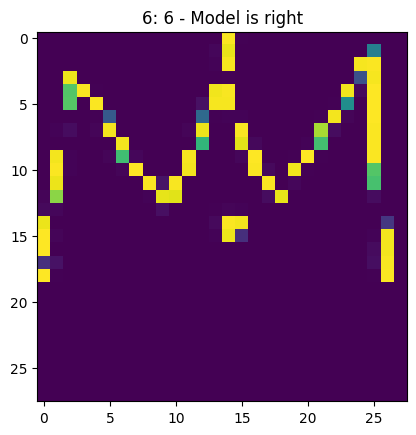

In [96]:
plt.title(f'{np.argmax(pred[0])}: {test_y[0]} - Model is {"right" if np.argmax(pred[0]) == test_y[0] else "wrong"}')
plt.imshow(test_X[0])

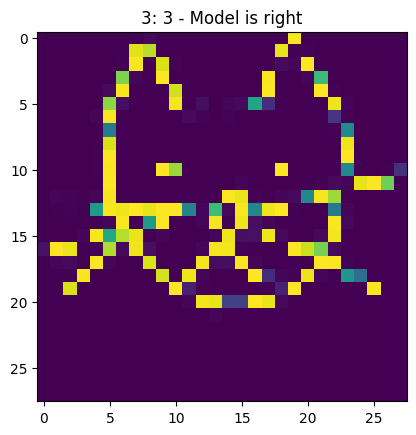

In [97]:
plt.title(f'{np.argmax(pred[1])}: {test_y[1]} - Model is {"right" if np.argmax(pred[1]) == test_y[1] else "wrong"}')
plt.imshow(test_X[1])

In [98]:
def create_model():
    model = Sequential()

    model.add(data_augmentation)
    model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
    model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())    

    model.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
        
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation="relu"))
        
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [99]:
model1 = create_model()
model1.load_weights('model_saves')

In [100]:
model1.evaluate(test_X, test_y)

56/56 [==============================] - 1s 7ms/step - loss: 0.6689 - accuracy: 0.8087


[0.6689218878746033, 0.8087248206138611]

**Sad you can't see my happiness...** <br>
**But now I'm moving one of the stickers to DONE on my kanban board**

In [101]:
import os
from PIL import Image

In [102]:
def user_data(image_path):
    X = []
    img = np.asarray(Image.open(image_path).convert('L'))
    img = np.expand_dims(img, axis=2)
    print(img.shape)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    print(img.shape)
    X.append(img)
    plt.imshow(img)
    return X

In [103]:
categories[:3]

['apples', 'basketballs', 'cars']

HELL YEAH IT IS!!!

CLOSE... SOOOOOO CLOSE

In [104]:
from data_load import dec

(256, 266, 1)
(28, 28, 1)
1/1 [==============================] - 0s 92ms/step


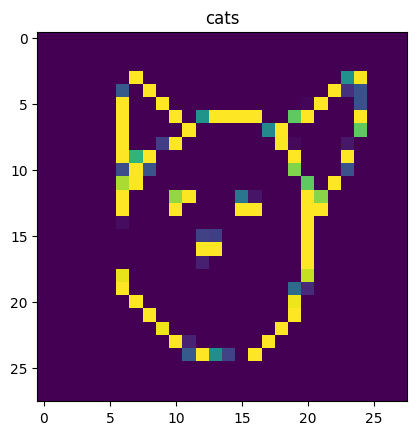

In [105]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Cat.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(dec[np.argmax(pred)])
plt.imshow(result);

(395, 422, 1)
(28, 28, 1)
1/1 [==============================] - 0s 17ms/step


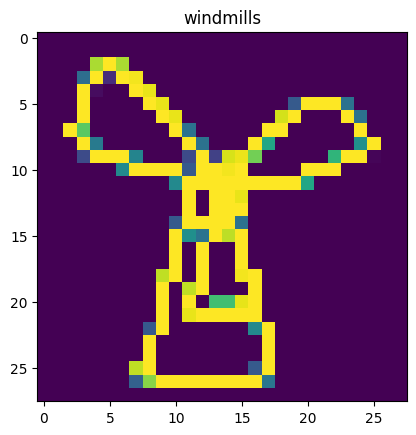

In [106]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Windmill.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(dec[np.argmax(pred)])
plt.imshow(result);

In [107]:
model1.save('model_cnn.h5')

(262, 300, 1)
(28, 28, 1)
1/1 [==============================] - 0s 20ms/step


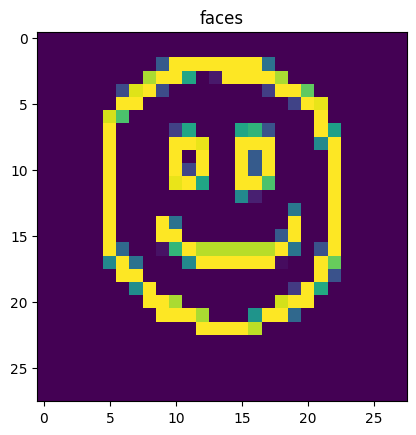

In [108]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Face.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(dec[np.argmax(pred)])
plt.imshow(result);

# **Classifier is finished**
**bang**